In [1]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torch.autograd import Variable
from PIL import Image

In [2]:
from torchvision import utils

In [3]:
import os

In [4]:
pic_one = '.\My Invitation.jpeg'
pic_two = '.\My Invitation(1).jpeg'

In [4]:
model1 = models.resnet18(pretrained=True)
# layer = model._modules.get('avgpool')

In [5]:
model1

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [6]:
class AlexNetConv4(nn.Module):
            def __init__(self):
                super(AlexNetConv4, self).__init__()
                self.features = nn.Sequential(
                    # stop at conv4
                    *list(model1.children())[:-1]
                )
            def forward(self, x):
                x = self.features(x)
                return x

model = AlexNetConv4()

In [8]:
model.cuda()
# model.to_device

AlexNetConv4(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats

In [9]:
model

AlexNetConv4(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats

In [23]:
torch.cuda.device(0)

In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [7]:
kernels = model.Conv2d.weight.detach()
fig, axarr = plt.subplots(kernels.size(0))
for idx in range(kernels.size(0)):
    axarr[idx].imshow(kernels[idx].squeeze())

AttributeError: 'AlexNetConv4' object has no attribute 'Conv2d'

In [8]:
from PIL import Image
# img=Image.fromarray(arr)
# img.show()

In [9]:
import scipy.misc
# rgb = scipy.misc.toimage(arr)


In [14]:
conv1 = nn.Conv2d(512,512,3,3)
weight = conv1.weight.data.numpy()
# plt.imshow(weight)
weight

array([[[[-4.24357131e-04, -1.62440073e-03,  1.24077303e-02],
         [-2.25141644e-03,  7.78563786e-03, -4.28266730e-03],
         [ 8.75363406e-03, -8.36794637e-03,  1.31819239e-02]],

        [[-9.82339773e-03, -9.80668701e-03,  1.30470758e-02],
         [-7.34996982e-04,  6.48748036e-03, -5.31939976e-03],
         [ 5.11923525e-03,  1.08999480e-03,  5.05492184e-03]],

        [[-1.43439937e-02, -7.06775440e-03,  6.66469242e-03],
         [-4.58076876e-03, -1.49125885e-03,  1.15578147e-02],
         [-1.06066167e-02,  1.46539612e-02, -4.09354456e-04]],

        ...,

        [[-1.41994655e-03,  2.62439717e-03,  1.14956433e-02],
         [-2.33407877e-03, -5.15506882e-03,  1.44475596e-02],
         [-1.33593483e-02, -3.01566161e-03,  1.18697900e-03]],

        [[-1.10669052e-02, -1.12296166e-02,  1.21819684e-02],
         [ 6.57843426e-04, -1.23081226e-02, -1.44979907e-02],
         [ 9.22885630e-03,  7.42659811e-03,  7.67092500e-03]],

        [[-8.20060261e-04,  1.09560499e-02, -3

In [15]:
import numpy as np

In [16]:
print(np.max(weight))

0.014731376


In [17]:
x=torch.from_numpy(weight)
type(x)
x.shape

torch.Size([512, 512, 3, 3])

In [19]:
from matplotlib import pyplot as plt 

In [20]:
plt.imshow(utils.make_grid(torch.from_numpy(weight), nrow=5).permute(1, 2, 0))

RuntimeError: The size of tensor a (3) must match the size of tensor b (512) at non-singleton dimension 0

TypeError: Invalid shape (512, 512, 3, 3) for image data

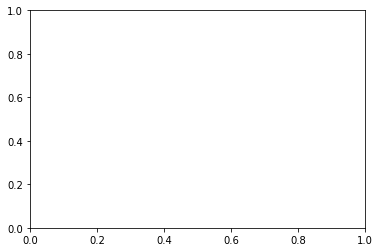

In [21]:
plt.imshow(weight, aspect='auto')

In [13]:
image='E:\\Vidooly\\vidooly\\image_similarity\\duplicates\\UC0tb5X3hjMRMpBIN-qTJFsA,OhGQ0UXnKNw.jpeg'
img=Image.open(image)
t_img=Variable(normalize(to_tensor(scaler(img))).unsqueeze(0))
vec = model(t_img)
arr=(vec.detach().numpy().squeeze().reshape(1,-1))
display(arr)
type(arr)

array([[0.9377597 , 1.0367448 , 0.8767678 , 1.0259062 , 0.922742  ,
        0.82714164, 0.94790757, 1.1722822 , 0.95298517, 0.91904247,
        0.9432081 , 0.903492  , 0.9006923 , 0.9207405 , 0.9168307 ,
        0.9728086 , 0.9382189 , 1.3273723 , 0.897429  , 0.8342342 ,
        0.86022496, 1.0769454 , 0.993071  , 0.9911303 , 1.0049897 ,
        0.93317205, 1.0047014 , 0.8944835 , 0.8594483 , 0.90441656,
        0.9303596 , 0.87134176, 0.8198506 , 0.80982155, 0.9314181 ,
        0.902778  , 0.94595766, 0.9434573 , 0.9405077 , 0.8912925 ,
        0.82305264, 0.82526636, 0.8928586 , 0.97863156, 0.87553287,
        0.89681274, 0.91049725, 1.2398137 , 0.92853385, 0.9120815 ,
        0.9698044 , 0.8564525 , 0.89918464, 0.88049245, 0.9348839 ,
        0.83575624, 1.0554144 , 0.9374374 , 1.1025537 , 0.9459109 ,
        0.90349936, 0.9966744 , 0.97960544, 0.8649211 , 0.87010795,
        1.0027608 , 0.8359588 , 0.9243289 , 1.0821493 , 0.872155  ,
        0.878911  , 0.8461411 , 0.86314493, 0.88

numpy.ndarray

In [11]:
import matplotlib.pyplot as plt

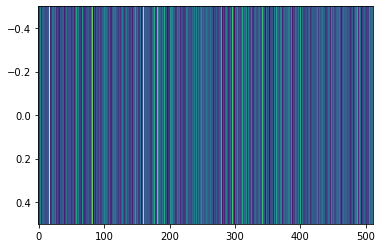

In [19]:
plt.imshow(arr,aspect="auto")

In [12]:
path='E:\\Vidooly\\vidooly\\image_similarity\\unsafe\\'
all_distances=[]
count=0
for f1 in os.listdir(path):
    cur=[]
    try:
        img1=Image.open(path+f1)
        
        t_img1=Variable(normalize(to_tensor(scaler(img1))).unsqueeze(0))
#         t_img.to('cuda:0')
        vec1=model(t_img1)
        for f2 in os.listdir(path):
            if(f1!=f2):
                count+=1
                img2=Image.open(path+f2)
                t_img2=Variable(normalize(to_tensor(scaler(img2))).unsqueeze(0))
#                 t_img2.to('cuda:0')
                vec2=model(t_img2)
                dist=(cosine_similarity(vec1.detach().numpy().squeeze().reshape(1,-1),vec2.detach().numpy().squeeze().reshape(1,-1)))
                cur.append(dist[0][0])
                if((count%100)==0):
                    print(count)
#                 if(count==100):
#                     break
        all_distances.append(cur)
    except Exception as e:
        print(f1,e)
#     print(f)


-5-bT5uy-Go.jpeg.jpeg cannot identify image file 'E:\\Vidooly\\vidooly\\image_similarity\\unsafe\\-5-bT5uy-Go.jpeg.jpeg'
-8C76rsT_4U.jpeg.jpeg cannot identify image file 'E:\\Vidooly\\vidooly\\image_similarity\\unsafe\\-8C76rsT_4U.jpeg.jpeg'
-BJIv3YYGSk.jpeg.jpeg cannot identify image file 'E:\\Vidooly\\vidooly\\image_similarity\\unsafe\\-BJIv3YYGSk.jpeg.jpeg'
-T049u9hdeg.jpeg.jpeg cannot identify image file 'E:\\Vidooly\\vidooly\\image_similarity\\unsafe\\-T049u9hdeg.jpeg.jpeg'
0.0,UCXLZmUcCFl-Kjolzt_Nrbww,AISbnK_s4nE.jpeg cannot identify image file 'E:\\Vidooly\\vidooly\\image_similarity\\unsafe\\0.0,UCXLZmUcCFl-Kjolzt_Nrbww,AISbnK_s4nE.jpeg'
0.01,UCSjPe5kinQtwcyHcFJyyMfw,tSkmf0QsFtU.jpeg cannot identify image file 'E:\\Vidooly\\vidooly\\image_similarity\\unsafe\\0.01,UCSjPe5kinQtwcyHcFJyyMfw,tSkmf0QsFtU.jpeg'
0.02,UCKwucPzHZ7zCUIf7If-Wo1g,_TBsSjRi2YQ.jpeg cannot identify image file 'E:\\Vidooly\\vidooly\\image_similarity\\unsafe\\0.02,UCKwucPzHZ7zCUIf7If-Wo1g,_TBsSjRi2YQ.jpeg'
0.1,U

KeyboardInterrupt: 

In [151]:
print(all_distances)

[0.99830496, 0.9983902, 0.9981645, 0.99819636, 0.9981998, 0.9985583, 0.9984056, 0.9983002, 0.9981621, 0.99827844, 0.9983125, 0.9983058, 0.9983292, 0.9982671, 0.9985333, 0.9981525, 0.99824977, 0.99846256, 0.99835706, 0.9984559, 0.9983683, 0.99830306, 0.9984123, 0.99833167, 0.99826694, 0.99832153, 0.998229, 0.99837923, 0.9984089, 0.998345, 0.9984226, 0.9984413, 0.998307, 0.9983468, 0.9984287, 0.99821687, 0.9983082, 0.9984345, 0.99836254, 0.99829525, 0.99849033, 0.9985117, 0.9982891, 0.9984052, 0.9983536, 0.99825126, 0.998456, 0.9983817, 0.9980889, 0.99842894, 0.9984861, 0.99826705, 0.99831724, 0.9983005, 0.99825764, 0.998304, 0.9982729, 0.99833965, 0.9981775, 0.9983823, 0.9982147, 0.9983504, 0.99850005, 0.99841726, 0.99835086, 0.99846524, 0.99835485, 0.9981077, 0.9983315, 0.9981599, 0.99841285, 0.9985121, 0.9983228, 0.9982754, 0.9982624, 0.9984486, 0.99846935, 0.9983481, 0.9982963, 0.9982503, 0.9982861, 0.99835354, 0.99820614, 0.9984082, 0.99829197, 0.99831736, 0.9983082, 0.9983428, 0.99

In [158]:
print(max(all_distances))
print(all_distances[927])
print(np.argmax(np.array(all_distances)))

0.99868155
0.99868155
927


In [159]:
file_list=os.listdir(path)

In [160]:
print(file_list[927])

UCQC1wGbOOIoC23fRGxt4kbg0Op9-Zu5GrM.jpeg.jpeg


In [7]:
from matplotlib.pyplot import imshow
from IPython.display import display

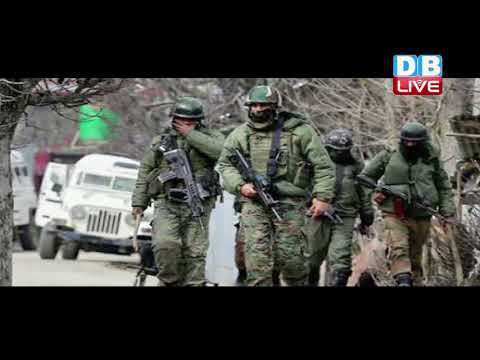

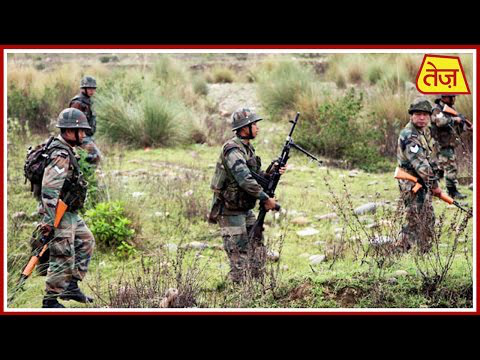

In [169]:
show_image1=Image.open(path+file_list[0])
show_image2=Image.open(path+file_list[927])
display(show_image1)
display(show_image2)

In [157]:
n_array=np.array(all_distances)
print(n_array)

[0.99830496 0.9983902  0.9981645  ... 0.99851274 0.998394   0.9981515 ]


In [84]:
img = Image.open(pic_two)
    # 2. Create a PyTorch Variable with the transformed image
t_img = Variable(normalize(to_tensor(scaler(img))).unsqueeze(0))
x=model(t_img)

In [85]:
img = Image.open(pic_one)
    # 2. Create a PyTorch Variable with the transformed image
t_img = Variable(normalize(to_tensor(scaler(img))).unsqueeze(0))
y=model(t_img)

In [97]:
print(x.shape)
print(y.shape)

torch.Size([1, 512, 1, 1])
torch.Size([1, 512, 1, 1])


In [93]:
arr1=np.array(x)

arr2=np.array(y)

RuntimeError: Can't call numpy() on Variable that requires grad. Use var.detach().numpy() instead.

In [6]:
# from sklearn.metrics.pairwise import cosine_similarity 
import numpy as np

In [113]:
z=x.detach().numpy()
z.squeeze().reshape(1,-1).shape

(1, 512)

In [124]:
dist=(cosine_similarity(x.detach().numpy().squeeze().reshape(1,-1),y.detach().numpy().squeeze().reshape(1,-1)))
print(dist[0][0])

0.9983513


In [12]:
scaler = transforms.Scale((224, 224))
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
to_tensor = transforms.ToTensor()

D:\python\lib\site-packages\torchvision\transforms\transforms.py:208: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


In [4]:
def get_vector(image_name):
    # 1. Load the image with Pillow library
    img = Image.open(image_name)
    # 2. Create a PyTorch Variable with the transformed image
    t_img = Variable(normalize(to_tensor(scaler(img))).unsqueeze(0))
    # 3. Create a vector of zeros that will hold our feature vector
    #    The 'avgpool' layer has an output size of 512
    my_embedding = torch.zeros(512)
    # 4. Define a function that will copy the output of a layer
    def copy_data(m, i, o):
        my_embedding.copy_(o.data)
    # 5. Attach that function to our selected layer
    h = layer.register_forward_hook(copy_data)
    # 6. Run the model on our transformed image
    model1(t_img)
    # 7. Detach our copy function from the layer
    h.remove()
    # 8. Return the feature vector
    return my_embedding

In [59]:
# model.children

In [ ]:
pic_o

In [72]:
pic_one_vector = get_vector(pic_one)
pic_two_vector = get_vector(pic_two)

In [75]:
pic_two_vector==pic_two_vector

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [73]:
pic_one_vector

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 